<a href="https://colab.research.google.com/github/karan51ngh/machineLearning/blob/main/supportVectorModel/supportVectorModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

##2.Loading Data

In [23]:
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [24]:
df=pd.read_csv('/content/mydrive/MyDrive/ColabNotebooks/MLLearningData/insurance.csv')

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##3.Data Cleaning

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##4.Feature Engineering

In [29]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [31]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [33]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [34]:
region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis = 1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


##5.Exploratory Analysis

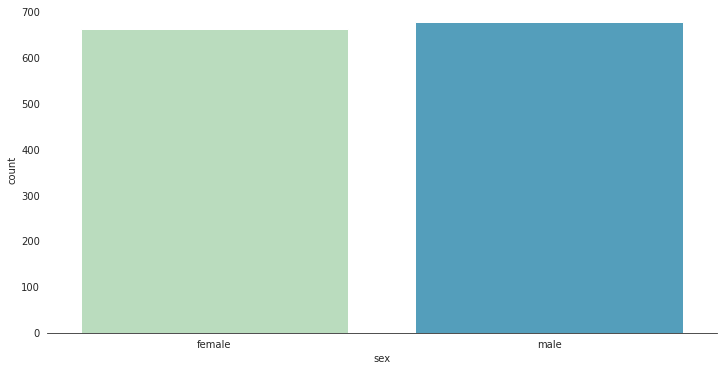

In [35]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

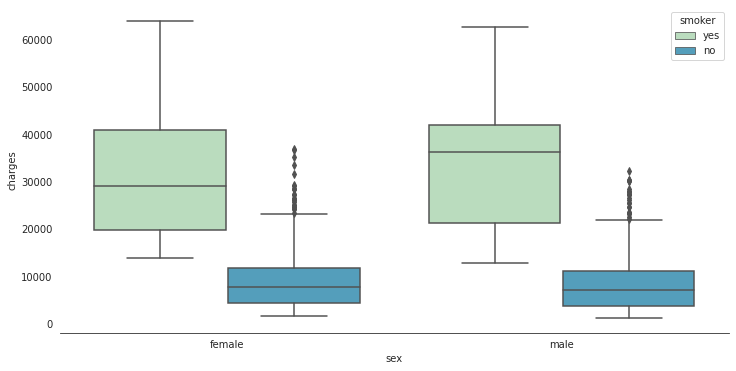

In [36]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'smoker')
sns.despine(left = True)

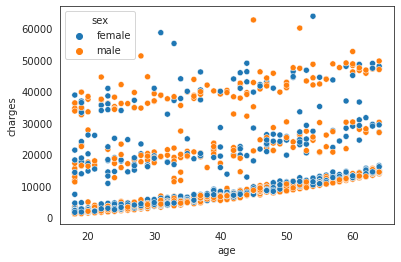

In [37]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

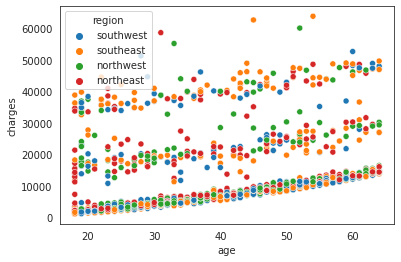

In [38]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

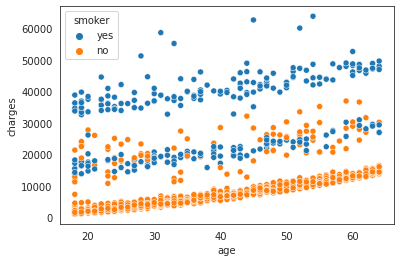

In [39]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'smoker')

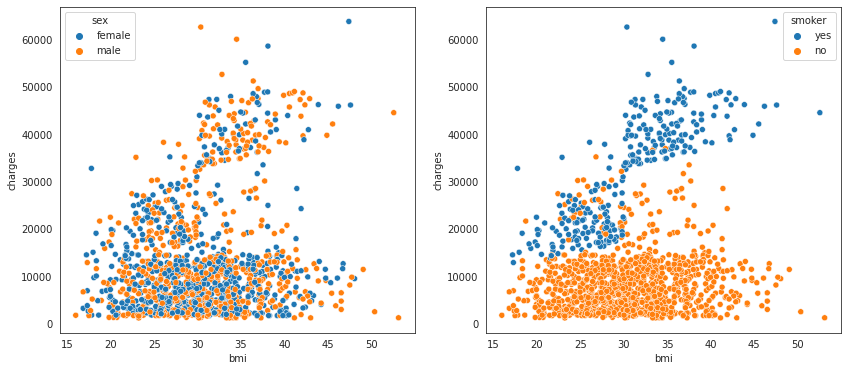

In [40]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'smoker', ax = ax[1])

In [41]:
df.drop(['sex', 'region','smoker', 'southwest'], axis=1, inplace=True)

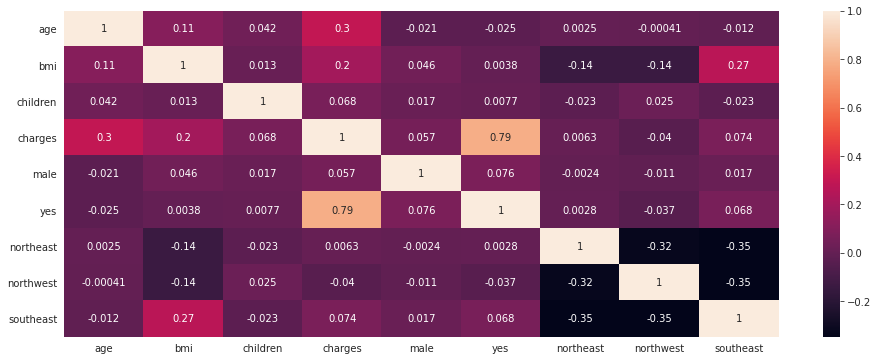

In [42]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

##6.Splitting the Data

In [43]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [46]:
x_train.shape

(802, 8)

In [47]:
df.head()

,age,bmi,children,charges,male,yes,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [50]:
scaled_x_train

array([[-1.03716326, -0.68788098,  2.36630023, ..., -0.55910848,
         1.75244572, -0.59367095],
       [-1.46659276, -1.23424136,  0.71606303, ..., -0.55910848,
        -0.57063108, -0.59367095],
       [ 0.60898314,  0.96612349, -0.10905558, ..., -0.55910848,
         1.75244572, -0.59367095],
       ...,
       [ 0.39426839, -0.53035675, -0.10905558, ..., -0.55910848,
         1.75244572, -0.59367095],
       [ 1.53941372,  1.3690539 ,  0.71606303, ..., -0.55910848,
        -0.57063108, -0.59367095],
       [ 0.39426839,  0.82435168, -0.93417418, ..., -0.55910848,
         1.75244572, -0.59367095]])

##7.Support Vector Regression

In [51]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [52]:
np.mean((y_test - predict)**2)

170971059.2656649

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Predict')

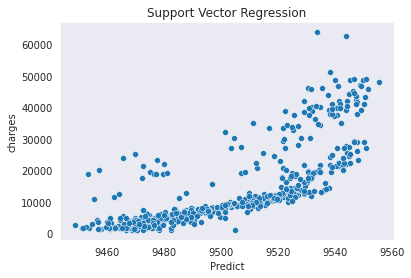

In [53]:
sns.set_style('dark')
f = sns.scatterplot(predict,y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')